# <center> PDL Lab11 Neural Network Exploration </center>

### 205229103

### Arzoo Sah

### Import libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from PIL import Image 
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
import pylab as plt
from tensorflow.keras.regularizers import l1,l2

### Import data

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#size of datasets
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Display an image of a digit

In [ ]:
x_train[568].shape

(28, 28)

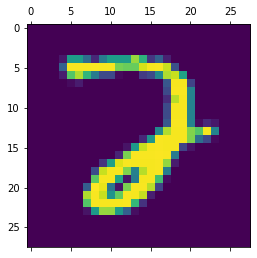

In [ ]:
plt.matshow(x_train[568])

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2

In [ ]:

#reshape the dataset 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#convert to float32 type 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255


In [ ]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### Display its class label

In [ ]:
y_train[568]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print("digit in the image :",np.argmax(y_train[568]))

digit in the image : 2


### Design your first model

Create a model with 3 hidden layers with 32 nodes, sigmoid activation for hidden layers, 10 nodes in the output layer with softmax activation. Print the summary

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

Compile the model with categorical_crossentropy loss, RMSprop optimizer and accuracy metrics

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

### Train the model

Train the model for the specified batch size and the number of epochs

In [ ]:
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=2,validation_split=0.2)

Epoch 1/2
375/375 - 2s - loss: 1.7317 - accuracy: 0.4809 - val_loss: 1.1412 - val_accuracy: 0.7281
Epoch 2/2
375/375 - 1s - loss: 0.8552 - accuracy: 0.7778 - val_loss: 0.6188 - val_accuracy: 0.8448


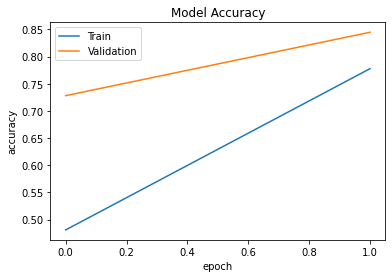

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Test it with test data and print the loss and accuracy values of the evaluation

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6303403377532959
Test accuracy: 0.843999981880188


In [ ]:
# Print the predicted values and the corresponding digit

prediction = model.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [7.8042465e-01 2.2557484e-05 7.1491048e-02 4.5688264e-02 8.5468119e-04
 8.8869713e-02 3.6782611e-03 3.1102030e-03 4.7569424e-03 1.1036395e-03]

Thresholded output
 [1 0 0 0 0 0 0 0 0 0]


### Create a table in MS Word and document the parameters and the observed loss and accuracy values

## PART-II: Explore the following and document your results 

- number of nodes
- Number of Layers
- Activation function
- Layer-node configurations
- optimizers
- L1, L2 Regularization
- Dropout Regularization
- different input sizes of the images
- Dataset split

**1.Number of Nodes**

Run neural network with single hidden layer, 32 nodes (with any activation function and any 
optimizer) for 10 epochs. Change number of nodes as 4, 32, 128, 512, 2056. What is the training and testing 
accuracies? Print the number of parameters of the model and training time for each of these configurations.

In [ ]:
first_layer_size = 32
model1 = Sequential()
model1.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 2s - loss: 0.5511 - accuracy: 0.8459 - val_loss: 0.2582 - val_accuracy: 0.9262
Epoch 2/10
375/375 - 1s - loss: 0.2451 - accuracy: 0.9300 - val_loss: 0.2066 - val_accuracy: 0.9416
Epoch 3/10
375/375 - 1s - loss: 0.1969 - accuracy: 0.9429 - val_loss: 0.1789 - val_accuracy: 0.9498
Epoch 4/10
375/375 - 1s - loss: 0.1686 - accuracy: 0.9506 - val_loss: 0.1650 - val_accuracy: 0.9533
Epoch 5/10
375/375 - 1s - loss: 0.1476 - accuracy: 0.9566 - val_loss: 0.1512 - val_accuracy: 0.9563
Epoch 6/10
375/375 - 1s - loss: 0.1315 - accuracy: 0.9616 - val_loss: 0.1441 - val_accuracy: 0.9585
Epoch 7/10
375/375 - 1s - loss: 0.1186 - accuracy: 0.9651 - val_loss: 0.1405 - val_accuracy: 0.9594
Epoch 8/10
375/375 - 1s - loss: 0.1076 - accuracy: 0.9684 - val_loss: 0.1320 - val_accuracy: 0.9613
Epoch 9/10
375/375 - 1s - loss: 0.0988 - accuracy: 0.9704 - val_loss: 0.1380 - val_accuracy: 0.9591
Epoch 10/10
375/375 - 1s - loss: 0.0911 - accuracy: 0.9728 - val_loss: 0.1307 - val_accuracy: 0.9622

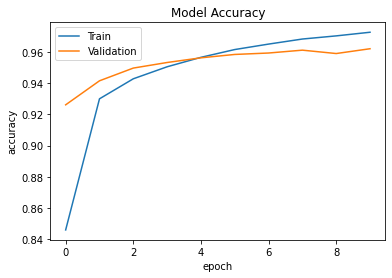

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11711745709180832
Test accuracy: 0.9628999829292297


In [ ]:
model2 = Sequential()
model2.add(Dense(2056, activation='relu', input_shape=(784,)))
model2.add(Dense(1028, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2056)              1613960   
_________________________________________________________________
dense_8 (Dense)              (None, 1028)              2114596   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               526848    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 4,322,358
Trainable params: 4,322,358
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 31s - loss: 0.2195 - accuracy: 0.9323 - val_loss: 0.1334 - val_accuracy: 0.9613
Epoch 2/10
375/375 - 31s - loss: 0.0908 - accuracy: 0.9730 - val_loss: 0.1179 - val_accuracy: 0.9657
Epoch 3/10
375/375 - 31s - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0993 - val_accuracy: 0.9732
Epoch 4/10
375/375 - 31s - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.1004 - val_accuracy: 0.9720
Epoch 5/10
375/375 - 31s - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.1086 - val_accuracy: 0.9726
Epoch 6/10
375/375 - 31s - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.1051 - val_accuracy: 0.9736
Epoch 7/10
375/375 - 31s - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.1095 - val_accuracy: 0.9743
Epoch 8/10
375/375 - 31s - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0974 - val_accuracy: 0.9793
Epoch 9/10
375/375 - 31s - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.1296 - val_accuracy: 0.9756
Epoch 10/10
375/375 - 31s - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.1138 - val_accura

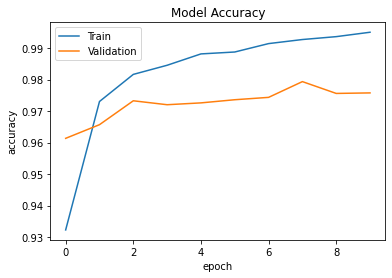

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10170241445302963
Test accuracy: 0.9747999906539917


**2.Number of Layers**

 Run neural network with 3 hidden layer, 32 nodes each (with any activation function and any optimizer) for 10 epochs. Change number of layers as 4, 6, 8, 16. What is the training and testing accuracies? Print
the number of parameters of the model and training time for each of these configurations. Run the same models
for 30 epochs. Any changes?

In [ ]:
model3 = Sequential()
model3.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss='categorical_crossentropy',optimizer=RMSprop(0.001),metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 2s - loss: 0.8310 - accuracy: 0.7579 - val_loss: 0.3688 - val_accuracy: 0.8962
Epoch 2/10
375/375 - 1s - loss: 0.3319 - accuracy: 0.9028 - val_loss: 0.2597 - val_accuracy: 0.9226
Epoch 3/10
375/375 - 1s - loss: 0.2489 - accuracy: 0.9262 - val_loss: 0.2187 - val_accuracy: 0.9353
Epoch 4/10
375/375 - 1s - loss: 0.2048 - accuracy: 0.9390 - val_loss: 0.1864 - val_accuracy: 0.9444
Epoch 5/10
375/375 - 1s - loss: 0.1750 - accuracy: 0.9478 - val_loss: 0.1835 - val_accuracy: 0.9433
Epoch 6/10
375/375 - 1s - loss: 0.1541 - accuracy: 0.9544 - val_loss: 0.1564 - val_accuracy: 0.9539
Epoch 7/10
375/375 - 1s - loss: 0.1368 - accuracy: 0.9590 - val_loss: 0.1495 - val_accuracy: 0.9542
Epoch 8/10
375/375 - 1s - loss: 0.1244 - accuracy: 0.9631 - val_loss: 0.1435 - val_accuracy: 0.9548
Epoch 9/10
375/375 - 1s - loss: 0.1143 - accuracy: 0.9655 - val_loss: 0.1382 - val_accuracy: 0.9582
Epoch 10/10
375/375 - 1s - loss: 0.1061 - accuracy: 0.9686 - val_loss: 0.1301 - val_accuracy: 0.9606

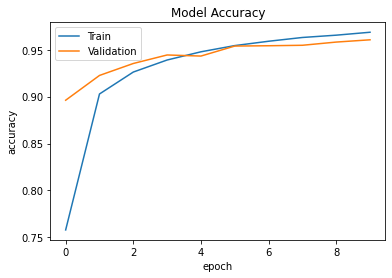

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12293721735477448
Test accuracy: 0.9646000266075134


In [ ]:
model4 = Sequential()
model4.add(Dense(256, activation='sigmoid', input_shape=(784,)))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(4, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 16)               

In [ ]:
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history4 = model4.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 3s - loss: 1.4179 - accuracy: 0.4826 - val_loss: 0.7478 - val_accuracy: 0.7885
Epoch 2/10
375/375 - 2s - loss: 0.5744 - accuracy: 0.8466 - val_loss: 0.4086 - val_accuracy: 0.8963
Epoch 3/10
375/375 - 2s - loss: 0.3461 - accuracy: 0.9092 - val_loss: 0.2834 - val_accuracy: 0.9259
Epoch 4/10
375/375 - 3s - loss: 0.2486 - accuracy: 0.9339 - val_loss: 0.2312 - val_accuracy: 0.9418
Epoch 5/10
375/375 - 3s - loss: 0.1977 - accuracy: 0.9461 - val_loss: 0.2199 - val_accuracy: 0.9430
Epoch 6/10
375/375 - 3s - loss: 0.1628 - accuracy: 0.9552 - val_loss: 0.1848 - val_accuracy: 0.9536
Epoch 7/10
375/375 - 3s - loss: 0.1366 - accuracy: 0.9614 - val_loss: 0.1985 - val_accuracy: 0.9482
Epoch 8/10
375/375 - 3s - loss: 0.1206 - accuracy: 0.9674 - val_loss: 0.1895 - val_accuracy: 0.9536
Epoch 9/10
375/375 - 2s - loss: 0.1012 - accuracy: 0.9711 - val_loss: 0.1499 - val_accuracy: 0.9643
Epoch 10/10
375/375 - 2s - loss: 0.0904 - accuracy: 0.9745 - val_loss: 0.1588 - val_accuracy: 0.9605

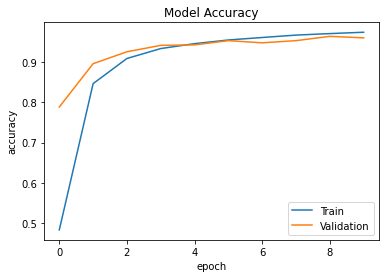

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16909344494342804
Test accuracy: 0.9591000080108643


**3. Activation function**

Run neural network with 3 hidden layer, 32 nodes each (with any optimizer) with sigmoid activation function for all layers, for 10 epochs. Change only the activation function as tanh, relu (for all 3 layers)
etc. What is the training and testing accuracies? Run the same models for 30 epochs. Any changes?

In [ ]:
model5 = Sequential()
model5.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model5.add(Dense(32, activation='sigmoid'))
model5.add(Dense(32, activation='sigmoid'))
model5.add(Dense(32, activation='sigmoid'))
model5.add(Dense(num_classes, activation='softmax'))

model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history5 = model5.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 2s - loss: 1.9045 - accuracy: 0.3386 - val_loss: 1.2993 - val_accuracy: 0.6083
Epoch 2/10
375/375 - 1s - loss: 1.0334 - accuracy: 0.7376 - val_loss: 0.8125 - val_accuracy: 0.8281
Epoch 3/10
375/375 - 1s - loss: 0.6907 - accuracy: 0.8538 - val_loss: 0.5431 - val_accuracy: 0.8856
Epoch 4/10
375/375 - 1s - loss: 0.4781 - accuracy: 0.8955 - val_loss: 0.3979 - val_accuracy: 0.9099
Epoch 5/10
375/375 - 1s - loss: 0.3689 - accuracy: 0.9147 - val_loss: 0.3314 - val_accuracy: 0.9195
Epoch 6/10
375/375 - 1s - loss: 0.3104 - accuracy: 0.9254 - val_loss: 0.2969 - val_accuracy: 0.9247
Epoch 7/10
375/375 - 1s - loss: 0.2736 - accuracy: 0.9319 - val_loss: 0.2705 - val_accuracy: 0.9302
Epoch 8/10
375/375 - 1s - loss: 0.2475 - accuracy: 0.9373 - val_loss: 0.2584 - val_accuracy: 0.9322
Epoch 9/10
375/375 - 1s - loss: 0.2282 - accuracy: 0.9417 - val_loss: 0.2446 - val_accuracy: 0.9345
Epoch 10/10
375/375 - 1s - loss: 0.2110 - accuracy: 0.9455 - val_loss: 0.2331 - val_accuracy: 0.9370

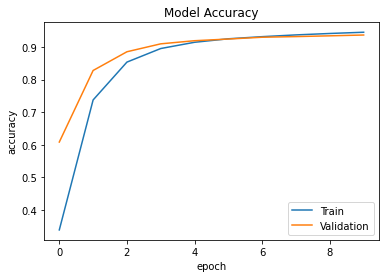

In [ ]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2409224659204483
Test accuracy: 0.9363999962806702


In [ ]:
model6 = Sequential()
model6.add(Dense(32, activation='tanh', input_shape=(784,)))
model6.add(Dense(32, activation='tanh'))
model6.add(Dense(32, activation='tanh'))
model6.add(Dense(32, activation='tanh'))
model6.add(Dense(num_classes, activation='softmax'))

model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history6 = model6.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 2s - loss: 0.5546 - accuracy: 0.8571 - val_loss: 0.2589 - val_accuracy: 0.9262
Epoch 2/10
375/375 - 1s - loss: 0.2199 - accuracy: 0.9366 - val_loss: 0.1896 - val_accuracy: 0.9440
Epoch 3/10
375/375 - 1s - loss: 0.1626 - accuracy: 0.9522 - val_loss: 0.1538 - val_accuracy: 0.9541
Epoch 4/10
375/375 - 1s - loss: 0.1325 - accuracy: 0.9615 - val_loss: 0.1397 - val_accuracy: 0.9591
Epoch 5/10
375/375 - 1s - loss: 0.1113 - accuracy: 0.9677 - val_loss: 0.1342 - val_accuracy: 0.9603
Epoch 6/10
375/375 - 1s - loss: 0.0974 - accuracy: 0.9719 - val_loss: 0.1328 - val_accuracy: 0.9607
Epoch 7/10
375/375 - 1s - loss: 0.0859 - accuracy: 0.9746 - val_loss: 0.1289 - val_accuracy: 0.9617
Epoch 8/10
375/375 - 1s - loss: 0.0757 - accuracy: 0.9778 - val_loss: 0.1298 - val_accuracy: 0.9638
Epoch 9/10
375/375 - 1s - loss: 0.0703 - accuracy: 0.9794 - val_loss: 0.1247 - val_accuracy: 0.9647
Epoch 10/10
375/375 - 1s - loss: 0.0619 - accuracy: 0.9816 - val_loss: 0.1357 - val_accuracy: 0.9628

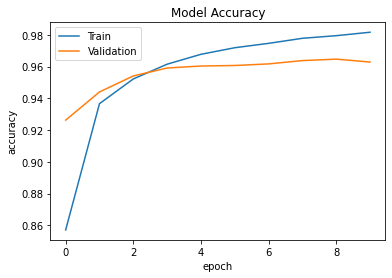

In [ ]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12826962769031525
Test accuracy: 0.9639000296592712


In [ ]:
#relu activation

model7 = Sequential()
model7.add(Dense(32, activation='relu', input_shape=(784,)))
model7.add(Dense(32, activation='relu'))
model7.add(Dense(32, activation='relu'))
model7.add(Dense(32, activation='relu'))
model7.add(Dense(num_classes, activation='softmax'))

model7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model7.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history7 = model7.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 2s - loss: 0.5822 - accuracy: 0.8226 - val_loss: 0.2446 - val_accuracy: 0.9312
Epoch 2/10
375/375 - 1s - loss: 0.2261 - accuracy: 0.9335 - val_loss: 0.1960 - val_accuracy: 0.9438
Epoch 3/10
375/375 - 1s - loss: 0.1792 - accuracy: 0.9468 - val_loss: 0.1803 - val_accuracy: 0.9469
Epoch 4/10
375/375 - 1s - loss: 0.1532 - accuracy: 0.9534 - val_loss: 0.1636 - val_accuracy: 0.9543
Epoch 5/10
375/375 - 1s - loss: 0.1361 - accuracy: 0.9591 - val_loss: 0.1595 - val_accuracy: 0.9532
Epoch 6/10
375/375 - 1s - loss: 0.1236 - accuracy: 0.9629 - val_loss: 0.1663 - val_accuracy: 0.9553
Epoch 7/10
375/375 - 1s - loss: 0.1123 - accuracy: 0.9658 - val_loss: 0.1388 - val_accuracy: 0.9597
Epoch 8/10
375/375 - 1s - loss: 0.1026 - accuracy: 0.9694 - val_loss: 0.1534 - val_accuracy: 0.9569
Epoch 9/10
375/375 - 1s - loss: 0.0950 - accuracy: 0.9713 - val_loss: 0.1335 - val_accuracy: 0.9609
Epoch 10/10
375/375 - 1s - loss: 0.0887 - accuracy: 0.9722 - val_loss: 0.1443 - val_accuracy: 0.9567

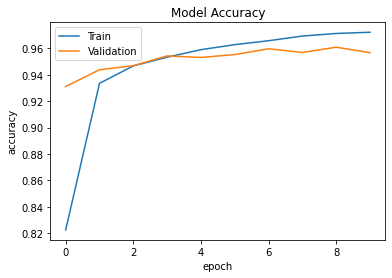

In [ ]:
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1376263052225113
Test accuracy: 0.9589999914169312


In [ ]:
#fit with epochs = 30

history7_1=model7.fit(x_train,y_train,batch_size=batch_size,epochs=30,verbose=2,validation_split=0.2 )

Epoch 1/30
375/375 - 1s - loss: 0.0799 - accuracy: 0.9753 - val_loss: 0.1363 - val_accuracy: 0.9603
Epoch 2/30
375/375 - 1s - loss: 0.0762 - accuracy: 0.9767 - val_loss: 0.1369 - val_accuracy: 0.9629
Epoch 3/30
375/375 - 1s - loss: 0.0713 - accuracy: 0.9774 - val_loss: 0.1419 - val_accuracy: 0.9626
Epoch 4/30
375/375 - 1s - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.1317 - val_accuracy: 0.9629
Epoch 5/30
375/375 - 1s - loss: 0.0626 - accuracy: 0.9801 - val_loss: 0.1410 - val_accuracy: 0.9628
Epoch 6/30
375/375 - 1s - loss: 0.0586 - accuracy: 0.9814 - val_loss: 0.1392 - val_accuracy: 0.9637
Epoch 7/30
375/375 - 1s - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.1359 - val_accuracy: 0.9629
Epoch 8/30
375/375 - 1s - loss: 0.0513 - accuracy: 0.9836 - val_loss: 0.1570 - val_accuracy: 0.9590
Epoch 9/30
375/375 - 1s - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.1396 - val_accuracy: 0.9629
Epoch 10/30
375/375 - 1s - loss: 0.0444 - accuracy: 0.9854 - val_loss: 0.1446 - val_accuracy: 0.9653

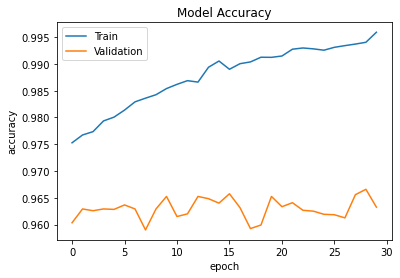

In [ ]:
plt.plot(history7_1.history['accuracy'])
plt.plot(history7_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18982166051864624
Test accuracy: 0.9638000130653381


**4. Activation function combinations**

For the three layers use different combinations of activation functions such as
layer 1: sigmoid, layer 2: relu, layer 3: tanh. There can be lot of combinations like this. Which one is the best for 3
layer each with 32 node architecture?

In [ ]:
model8 = Sequential()
model8.add(Dense(32, activation='sigmoid', input_shape=(784,)))
model8.add(Dense(32, activation='relu'))
model8.add(Dense(32, activation='tanh'))
model8.add(Dense(32, activation='sigmoid'))
model8.add(Dense(num_classes, activation='softmax'))

model8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_46 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model8.compile(loss='categorical_crossentropy',optimizer=RMSprop(0.001),metrics=['accuracy'])

In [ ]:
history8 = model8.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 2s - loss: 1.3062 - accuracy: 0.6275 - val_loss: 0.6491 - val_accuracy: 0.8478
Epoch 2/10
375/375 - 1s - loss: 0.4462 - accuracy: 0.8915 - val_loss: 0.3161 - val_accuracy: 0.9139
Epoch 3/10
375/375 - 1s - loss: 0.2834 - accuracy: 0.9215 - val_loss: 0.2522 - val_accuracy: 0.9310
Epoch 4/10
375/375 - 1s - loss: 0.2267 - accuracy: 0.9366 - val_loss: 0.2049 - val_accuracy: 0.9434
Epoch 5/10
375/375 - 1s - loss: 0.1915 - accuracy: 0.9460 - val_loss: 0.1885 - val_accuracy: 0.9480
Epoch 6/10
375/375 - 1s - loss: 0.1679 - accuracy: 0.9525 - val_loss: 0.1699 - val_accuracy: 0.9527
Epoch 7/10
375/375 - 1s - loss: 0.1498 - accuracy: 0.9576 - val_loss: 0.1662 - val_accuracy: 0.9538
Epoch 8/10
375/375 - 1s - loss: 0.1362 - accuracy: 0.9614 - val_loss: 0.1561 - val_accuracy: 0.9553
Epoch 9/10
375/375 - 1s - loss: 0.1228 - accuracy: 0.9656 - val_loss: 0.1565 - val_accuracy: 0.9547
Epoch 10/10
375/375 - 1s - loss: 0.1143 - accuracy: 0.9679 - val_loss: 0.1457 - val_accuracy: 0.9591

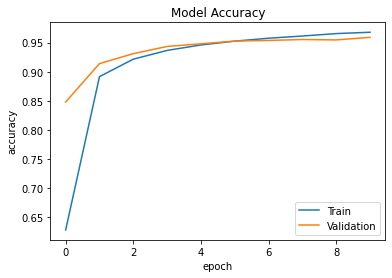

In [ ]:
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1480896919965744
Test accuracy: 0.95660001039505


**5.Layer-node combinations**

 Run different models mimicking the following structures. Which one gives best
accuracy? Print the number of parameters of the model and training time for each of these configurations.

In [ ]:
model9 = Sequential()
model9.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model9.add(Dense(256, activation='relu'))
model9.add(Dense(128, activation='relu'))
model9.add(Dense(64, activation='relu'))
model9.add(Dense(32, activation='relu'))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(num_classes, activation='softmax'))

In [ ]:
model9.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history9 = model9.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 5s - loss: 0.7506 - accuracy: 0.7577 - val_loss: 0.3632 - val_accuracy: 0.8947
Epoch 2/10
375/375 - 4s - loss: 0.2985 - accuracy: 0.9138 - val_loss: 0.2287 - val_accuracy: 0.9319
Epoch 3/10
375/375 - 4s - loss: 0.2136 - accuracy: 0.9372 - val_loss: 0.1798 - val_accuracy: 0.9502
Epoch 4/10
375/375 - 4s - loss: 0.1572 - accuracy: 0.9532 - val_loss: 0.1514 - val_accuracy: 0.9553
Epoch 5/10
375/375 - 4s - loss: 0.1262 - accuracy: 0.9615 - val_loss: 0.1224 - val_accuracy: 0.9639
Epoch 6/10
375/375 - 4s - loss: 0.1033 - accuracy: 0.9684 - val_loss: 0.1197 - val_accuracy: 0.9649
Epoch 7/10
375/375 - 4s - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.1124 - val_accuracy: 0.9657
Epoch 8/10
375/375 - 4s - loss: 0.0713 - accuracy: 0.9773 - val_loss: 0.1109 - val_accuracy: 0.9672
Epoch 9/10
375/375 - 4s - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.0980 - val_accuracy: 0.9716
Epoch 10/10
375/375 - 4s - loss: 0.0536 - accuracy: 0.9824 - val_loss: 0.1010 - val_accuracy: 0.9710

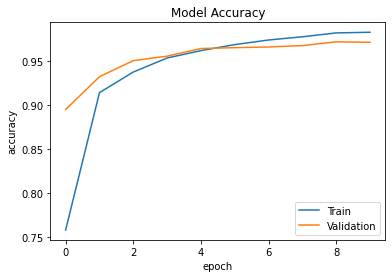

In [ ]:
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model9.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09590981900691986
Test accuracy: 0.9710999727249146


**6.Optimizer**

 Run neural network with 3 hidden layer, 32 nodes each with SGD optimizer with relu activation
function for all layers, for 10 epochs. Run the same model with optimizers such as Momentum, RMSProp, Adam
etc. Which one gives good accuracy for 10 epochs?

In [ ]:
model10 = Sequential()
model10.add(Dense(32, activation='relu', input_shape=(784,)))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(num_classes, activation='softmax'))

model10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_55 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_56 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_57 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_58 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model10.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [ ]:
history10=model10.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 1s - loss: 2.0887 - accuracy: 0.2827 - val_loss: 1.6481 - val_accuracy: 0.4940
Epoch 2/10
375/375 - 1s - loss: 1.0780 - accuracy: 0.6723 - val_loss: 0.6958 - val_accuracy: 0.7983
Epoch 3/10
375/375 - 1s - loss: 0.6132 - accuracy: 0.8120 - val_loss: 0.4913 - val_accuracy: 0.8574
Epoch 4/10
375/375 - 1s - loss: 0.4796 - accuracy: 0.8576 - val_loss: 0.4045 - val_accuracy: 0.8790
Epoch 5/10
375/375 - 1s - loss: 0.4111 - accuracy: 0.8805 - val_loss: 0.3598 - val_accuracy: 0.8941
Epoch 6/10
375/375 - 1s - loss: 0.3711 - accuracy: 0.8922 - val_loss: 0.3294 - val_accuracy: 0.9051
Epoch 7/10
375/375 - 1s - loss: 0.3427 - accuracy: 0.9007 - val_loss: 0.3087 - val_accuracy: 0.9114
Epoch 8/10
375/375 - 1s - loss: 0.3209 - accuracy: 0.9075 - val_loss: 0.2912 - val_accuracy: 0.9158
Epoch 9/10
375/375 - 1s - loss: 0.3029 - accuracy: 0.9123 - val_loss: 0.2765 - val_accuracy: 0.9205
Epoch 10/10
375/375 - 1s - loss: 0.2873 - accuracy: 0.9173 - val_loss: 0.2639 - val_accuracy: 0.9249

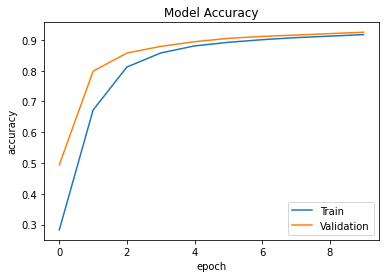

In [ ]:
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model10.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2718486189842224
Test accuracy: 0.9211000204086304


In [ ]:
#run same model with other optimizers
model10.compile(loss='categorical_crossentropy',optimizer=RMSprop(0.0001),metrics=['accuracy'])

In [ ]:
history10_1=model10.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 2s - loss: 0.2685 - accuracy: 0.9229 - val_loss: 0.2513 - val_accuracy: 0.9285
Epoch 2/10
375/375 - 1s - loss: 0.2535 - accuracy: 0.9270 - val_loss: 0.2348 - val_accuracy: 0.9329
Epoch 3/10
375/375 - 1s - loss: 0.2401 - accuracy: 0.9312 - val_loss: 0.2237 - val_accuracy: 0.9373
Epoch 4/10
375/375 - 1s - loss: 0.2282 - accuracy: 0.9334 - val_loss: 0.2155 - val_accuracy: 0.9387
Epoch 5/10
375/375 - 1s - loss: 0.2175 - accuracy: 0.9369 - val_loss: 0.2067 - val_accuracy: 0.9416
Epoch 6/10
375/375 - 1s - loss: 0.2081 - accuracy: 0.9391 - val_loss: 0.2017 - val_accuracy: 0.9434
Epoch 7/10
375/375 - 1s - loss: 0.1994 - accuracy: 0.9421 - val_loss: 0.1920 - val_accuracy: 0.9467
Epoch 8/10
375/375 - 1s - loss: 0.1916 - accuracy: 0.9438 - val_loss: 0.1886 - val_accuracy: 0.9463
Epoch 9/10
375/375 - 2s - loss: 0.1845 - accuracy: 0.9471 - val_loss: 0.1818 - val_accuracy: 0.9482
Epoch 10/10
375/375 - 2s - loss: 0.1778 - accuracy: 0.9484 - val_loss: 0.1784 - val_accuracy: 0.9494

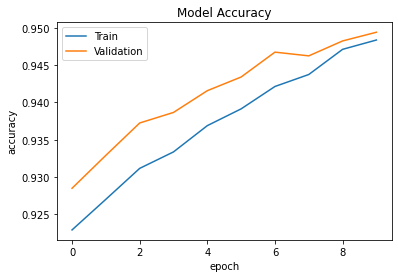

In [ ]:
plt.plot(history10_1.history['accuracy'])
plt.plot(history10_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model10.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18515536189079285
Test accuracy: 0.9440000057220459


**7.L1, L2 Regularization**

 Run neural network with 3 hidden layer, 128 nodes each (with any optimizer) with relu activation function for all layers, for 10 epochs. Add L1 regularization to each layer and see the change in the
training and testing accuracies. Change in the Lambda parameter in L1 regularization with smaller and bigger
numbers and see the change in accuracies. Instead of L1, now do it with L2. What is the effect?

In [ ]:
model11 = Sequential()
model11.add(Dense(128, activation='relu', input_shape=(784,)))
model11.add(Dense(128, activation='relu',kernel_regularizer='l1'))
model11.add(Dense(128, activation='relu',kernel_regularizer='l1'))
model11.add(Dense(128, activation='relu',kernel_regularizer='l1'))
model11.add(Dense(num_classes, activation='softmax'))

model11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_60 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_61 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_62 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model11.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history11=model11.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 3s - loss: 7.2283 - accuracy: 0.7810 - val_loss: 1.2785 - val_accuracy: 0.8604
Epoch 2/10
375/375 - 2s - loss: 1.1194 - accuracy: 0.8652 - val_loss: 0.9626 - val_accuracy: 0.8832
Epoch 3/10
375/375 - 2s - loss: 0.9029 - accuracy: 0.8852 - val_loss: 0.8117 - val_accuracy: 0.8988
Epoch 4/10
375/375 - 2s - loss: 0.7835 - accuracy: 0.8980 - val_loss: 0.7128 - val_accuracy: 0.9139
Epoch 5/10
375/375 - 2s - loss: 0.7078 - accuracy: 0.9091 - val_loss: 0.6619 - val_accuracy: 0.9204
Epoch 6/10
375/375 - 2s - loss: 0.6521 - accuracy: 0.9158 - val_loss: 0.6215 - val_accuracy: 0.9252
Epoch 7/10
375/375 - 2s - loss: 0.6071 - accuracy: 0.9211 - val_loss: 0.5818 - val_accuracy: 0.9294
Epoch 8/10
375/375 - 2s - loss: 0.5700 - accuracy: 0.9251 - val_loss: 0.5585 - val_accuracy: 0.9312
Epoch 9/10
375/375 - 2s - loss: 0.5461 - accuracy: 0.9293 - val_loss: 0.5282 - val_accuracy: 0.9352
Epoch 10/10
375/375 - 2s - loss: 0.5232 - accuracy: 0.9321 - val_loss: 0.5109 - val_accuracy: 0.9348

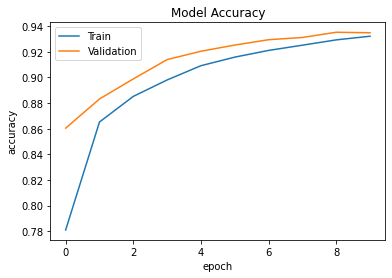

In [ ]:
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model11.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.521335244178772
Test accuracy: 0.9293000102043152


In [ ]:
model12 = Sequential()
model12.add(Dense(128, activation='relu', input_shape=(784,)))
model12.add(Dense(128, activation='relu',kernel_regularizer='l2'))
model12.add(Dense(128, activation='relu',kernel_regularizer='l2'))
model12.add(Dense(128, activation='relu',kernel_regularizer='l2'))
model12.add(Dense(num_classes, activation='softmax'))

model12.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_65 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_66 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_67 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_68 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model12.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history12=model12.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 4s - loss: 1.5776 - accuracy: 0.8744 - val_loss: 0.6770 - val_accuracy: 0.9341
Epoch 2/10
375/375 - 2s - loss: 0.5253 - accuracy: 0.9390 - val_loss: 0.4139 - val_accuracy: 0.9500
Epoch 3/10
375/375 - 2s - loss: 0.3732 - accuracy: 0.9503 - val_loss: 0.3378 - val_accuracy: 0.9565
Epoch 4/10
375/375 - 2s - loss: 0.3129 - accuracy: 0.9584 - val_loss: 0.2968 - val_accuracy: 0.9610
Epoch 5/10
375/375 - 2s - loss: 0.2791 - accuracy: 0.9624 - val_loss: 0.2831 - val_accuracy: 0.9612
Epoch 6/10
375/375 - 2s - loss: 0.2510 - accuracy: 0.9680 - val_loss: 0.2626 - val_accuracy: 0.9628
Epoch 7/10
375/375 - 2s - loss: 0.2347 - accuracy: 0.9702 - val_loss: 0.2379 - val_accuracy: 0.9657
Epoch 8/10
375/375 - 2s - loss: 0.2222 - accuracy: 0.9704 - val_loss: 0.2434 - val_accuracy: 0.9614
Epoch 9/10
375/375 - 2s - loss: 0.2064 - accuracy: 0.9743 - val_loss: 0.2200 - val_accuracy: 0.9669
Epoch 10/10
375/375 - 2s - loss: 0.1963 - accuracy: 0.9748 - val_loss: 0.2194 - val_accuracy: 0.9658

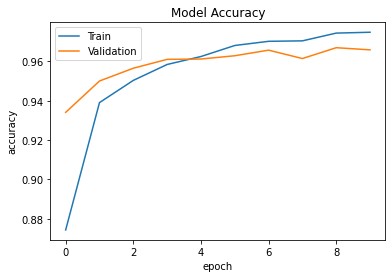

In [ ]:
plt.plot(history12.history['accuracy'])
plt.plot(history12.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model12.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22196179628372192
Test accuracy: 0.9649999737739563


In [ ]:
model13 = Sequential()
model13.add(Dense(512, activation='relu',kernel_regularizer='l1', input_shape=(784,)))
model13.add(Dense(256, activation='relu'))
model13.add(Dense(128, activation='relu'))
model13.add(Dense(64, activation='relu',kernel_regularizer='l1'))
model13.add(Dense(num_classes, activation='softmax'))

model13.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_70 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_71 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_72 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_73 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model13.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history13=model13.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 6s - loss: 12.3470 - accuracy: 0.7820 - val_loss: 1.8566 - val_accuracy: 0.8517
Epoch 2/10
375/375 - 5s - loss: 1.6621 - accuracy: 0.8555 - val_loss: 1.4785 - val_accuracy: 0.8802
Epoch 3/10
375/375 - 5s - loss: 1.4399 - accuracy: 0.8721 - val_loss: 1.4061 - val_accuracy: 0.8648
Epoch 4/10
375/375 - 5s - loss: 1.3252 - accuracy: 0.8851 - val_loss: 1.2754 - val_accuracy: 0.8997
Epoch 5/10
375/375 - 5s - loss: 1.2557 - accuracy: 0.8951 - val_loss: 1.1799 - val_accuracy: 0.9078
Epoch 6/10
375/375 - 5s - loss: 1.2253 - accuracy: 0.8980 - val_loss: 1.1857 - val_accuracy: 0.9126
Epoch 7/10
375/375 - 5s - loss: 1.1875 - accuracy: 0.9018 - val_loss: 1.1951 - val_accuracy: 0.9068
Epoch 8/10
375/375 - 5s - loss: 1.1689 - accuracy: 0.9057 - val_loss: 1.1381 - val_accuracy: 0.9129
Epoch 9/10
375/375 - 5s - loss: 1.1506 - accuracy: 0.9071 - val_loss: 1.1016 - val_accuracy: 0.9233
Epoch 10/10
375/375 - 5s - loss: 1.1231 - accuracy: 0.9103 - val_loss: 1.0728 - val_accuracy: 0.920

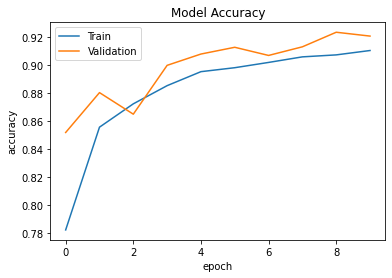

In [ ]:
plt.plot(history13.history['accuracy'])
plt.plot(history13.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model13.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0799305438995361
Test accuracy: 0.9176999926567078


**8. Dropout Regularization**

Run neural network with 3 hidden layer, 128 nodes each (with any optimizer) with relu activation function for all layers, for 10 epochs. Add dropout layer in between the hidden layers and see the
change in the training and testing accuracies. Change in the dropout rate in layers with smaller and bigger
numbers and see the change in accuracies.

In [ ]:
model14 = Sequential()
model14.add(Dense(128, activation='relu', input_shape=(784,)))
model14.add(Dense(128, activation='relu'))
model14.add(Dropout(0.3))
model14.add(Dense(128, activation='relu'))
model14.add(Dropout(0.3))
model14.add(Dense(128, activation='relu'))
model14.add(Dropout(0.3))
model14.add(Dense(num_classes, activation='softmax'))

model14.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_75 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)             

In [ ]:
model14.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history14=model14.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 3s - loss: 0.5312 - accuracy: 0.8356 - val_loss: 0.1719 - val_accuracy: 0.9504
Epoch 2/10
375/375 - 2s - loss: 0.1973 - accuracy: 0.9446 - val_loss: 0.1287 - val_accuracy: 0.9622
Epoch 3/10
375/375 - 2s - loss: 0.1358 - accuracy: 0.9605 - val_loss: 0.1089 - val_accuracy: 0.9686
Epoch 4/10
375/375 - 2s - loss: 0.1064 - accuracy: 0.9696 - val_loss: 0.0984 - val_accuracy: 0.9709
Epoch 5/10
375/375 - 2s - loss: 0.0883 - accuracy: 0.9752 - val_loss: 0.1015 - val_accuracy: 0.9717
Epoch 6/10
375/375 - 2s - loss: 0.0739 - accuracy: 0.9791 - val_loss: 0.1043 - val_accuracy: 0.9723
Epoch 7/10
375/375 - 2s - loss: 0.0621 - accuracy: 0.9831 - val_loss: 0.1025 - val_accuracy: 0.9747
Epoch 8/10
375/375 - 2s - loss: 0.0573 - accuracy: 0.9830 - val_loss: 0.1007 - val_accuracy: 0.9747
Epoch 9/10
375/375 - 2s - loss: 0.0522 - accuracy: 0.9856 - val_loss: 0.0952 - val_accuracy: 0.9766
Epoch 10/10
375/375 - 2s - loss: 0.0468 - accuracy: 0.9866 - val_loss: 0.1026 - val_accuracy: 0.9745

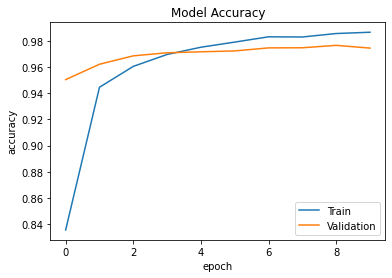

In [ ]:
plt.plot(history14.history['accuracy'])
plt.plot(history14.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model14.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09791391342878342
Test accuracy: 0.9764000177383423


In [ ]:
model15 = Sequential()
model15.add(Dense(128, activation='relu', input_shape=(784,)))
model15.add(Dropout(0.2))
model15.add(Dense(64, activation='relu'))
model15.add(Dense(32, activation='relu'))
model15.add(Dense(16, activation='relu'))
model15.add(Dropout(0.2))
model15.add(Dense(num_classes, activation='softmax'))

model15.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_81 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_82 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 10)              

In [ ]:
model15.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history15=model15.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 2s - loss: 0.7763 - accuracy: 0.7572 - val_loss: 0.2267 - val_accuracy: 0.9382
Epoch 2/10
375/375 - 2s - loss: 0.3184 - accuracy: 0.9112 - val_loss: 0.1566 - val_accuracy: 0.9573
Epoch 3/10
375/375 - 2s - loss: 0.2403 - accuracy: 0.9333 - val_loss: 0.1339 - val_accuracy: 0.9643
Epoch 4/10
375/375 - 1s - loss: 0.1977 - accuracy: 0.9458 - val_loss: 0.1309 - val_accuracy: 0.9658
Epoch 5/10
375/375 - 2s - loss: 0.1716 - accuracy: 0.9525 - val_loss: 0.1188 - val_accuracy: 0.9680
Epoch 6/10
375/375 - 2s - loss: 0.1503 - accuracy: 0.9576 - val_loss: 0.1070 - val_accuracy: 0.9715
Epoch 7/10
375/375 - 2s - loss: 0.1319 - accuracy: 0.9634 - val_loss: 0.1120 - val_accuracy: 0.9718
Epoch 8/10
375/375 - 2s - loss: 0.1200 - accuracy: 0.9674 - val_loss: 0.1165 - val_accuracy: 0.9701
Epoch 9/10
375/375 - 2s - loss: 0.1118 - accuracy: 0.9690 - val_loss: 0.1073 - val_accuracy: 0.9714
Epoch 10/10
375/375 - 1s - loss: 0.1039 - accuracy: 0.9703 - val_loss: 0.1018 - val_accuracy: 0.9741

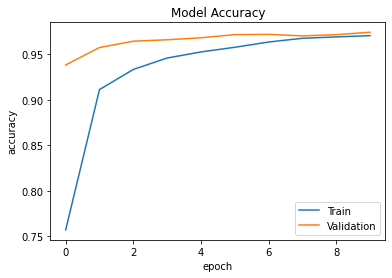

In [ ]:
plt.plot(history15.history['accuracy'])
plt.plot(history15.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model15.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10325074195861816
Test accuracy: 0.9753999710083008


**9. Input Size**

 Run neural network with 3 hidden layer, 128 nodes each (with any optimizer) with relu activation
function for all layers, for 10 epochs. Instead of 28x28 now run different model with Digit images in 56x56,
112x112 and 224x224 sizes. Print how the model size and accuracies change?


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 2

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


#### 56x56

In [ ]:
x_train56=[]
x_test56=[]

for i in range(len(x_train)):
    im = Image.fromarray(x_train[i])
    im = im.resize((56,56))
    im = np.array(im)
    x_train56.append(im)

for j in range(len(x_test)):
    im = Image.fromarray(x_test[j])
    im = im.resize((56,56))
    im = np.array(im)
    x_test56.append(im)

x_train56 = np.array(x_train56)
x_test56 = np.array(x_test56)  

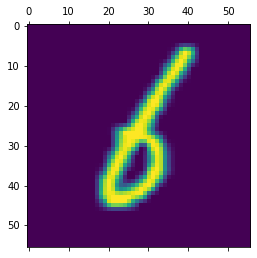

In [ ]:
plt.matshow(x_train56[256])

In [ ]:
np.argmax(y_train[256])

6

In [ ]:
x_train56 = x_train56.reshape(x_train56.shape[0],3136 )
x_test56 = x_test56.reshape(x_test56.shape[0],3136)

#convert to float32 type 
x_train56 = x_train56.astype('float32')
x_test56 = x_test56.astype('float32')

# Normalize to 0 to 1 range
x_train56 /= 255
x_test56 /= 255

In [ ]:
print(x_train56.shape, 'train shape')
print(x_test56.shape, 'test shape')

(60000, 3136) train shape
(10000, 3136) test shape


In [ ]:
model_56 = Sequential()
model_56.add(Dense(128, activation='relu', input_shape=(3136,)))
model_56.add(Dense(128, activation='relu'))
model_56.add(Dense(128, activation='relu'))
model_56.add(Dense(128, activation='relu'))
model_56.add(Dense(num_classes, activation='softmax'))

model_56.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_85 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_86 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_87 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_88 (Dense)             (None, 10)                1290      
Total params: 452,362
Trainable params: 452,362
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_56.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [ ]:
history56=model_56.fit(x_train56,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
375/375 - 4s - loss: 1.3287 - accuracy: 0.6378 - val_loss: 0.4835 - val_accuracy: 0.8714
Epoch 2/10
375/375 - 3s - loss: 0.4036 - accuracy: 0.8869 - val_loss: 0.3170 - val_accuracy: 0.9080
Epoch 3/10
375/375 - 3s - loss: 0.3122 - accuracy: 0.9109 - val_loss: 0.2699 - val_accuracy: 0.9213
Epoch 4/10
375/375 - 3s - loss: 0.2689 - accuracy: 0.9232 - val_loss: 0.2374 - val_accuracy: 0.9317
Epoch 5/10
375/375 - 3s - loss: 0.2389 - accuracy: 0.9312 - val_loss: 0.2125 - val_accuracy: 0.9388
Epoch 6/10
375/375 - 3s - loss: 0.2152 - accuracy: 0.9372 - val_loss: 0.1975 - val_accuracy: 0.9449
Epoch 7/10
375/375 - 3s - loss: 0.1966 - accuracy: 0.9421 - val_loss: 0.1863 - val_accuracy: 0.9463
Epoch 8/10
375/375 - 3s - loss: 0.1803 - accuracy: 0.9472 - val_loss: 0.1709 - val_accuracy: 0.9506
Epoch 9/10
375/375 - 3s - loss: 0.1667 - accuracy: 0.9507 - val_loss: 0.1639 - val_accuracy: 0.9535
Epoch 10/10
375/375 - 3s - loss: 0.1551 - accuracy: 0.9544 - val_loss: 0.1530 - val_accuracy: 0.9557

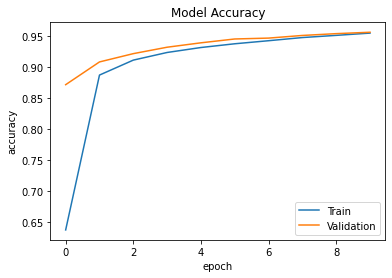

In [ ]:
plt.plot(history56.history['accuracy'])
plt.plot(history56.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model_56.evaluate(x_test56, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15368101000785828
Test accuracy: 0.9538000226020813


#### 112x112

In [ ]:
x_train112=[]
x_test112=[]

for i in range(len(x_train)):
  im = Image.fromarray(x_train[i])
  im = im.resize((112,112))
  im = np.array(im)
  x_train112.append(im)

for j in range(len(x_test)):
  im = Image.fromarray(x_test[j])
  im = im.resize((112,112))
  im = np.array(im)
  x_test112.append(im)

x_train112 = np.array(x_train112)
x_test112 = np.array(x_test112)  

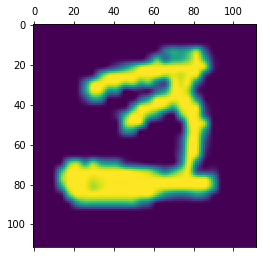

In [ ]:
plt.matshow(x_train112[1097])

In [ ]:
np.argmax(y_train[1097])

3

In [ ]:
x_train112 = x_train112.reshape(x_train112.shape[0],12544 )
x_test112 = x_test112.reshape(x_test112.shape[0],12544)

#convert to float32 type 
x_train112 = x_train112.astype('float32')
x_test112 = x_test112.astype('float32')

# Normalize to 0 to 1 range
x_train112 /= 255
x_test112/= 255

In [ ]:
print(x_train112.shape ,"train shape")
print(x_test112.shape ,"test shape")

(60000, 12544) train shape
(10000, 12544) test shape


In [ ]:
model_112 = Sequential()
model_112.add(Dense(128, activation='relu', input_shape=(12544,)))
model_112.add(Dense(128, activation='relu'))
model_112.add(Dense(128, activation='relu'))
model_112.add(Dense(128, activation='relu'))
model_112.add(Dense(num_classes, activation='softmax'))

model_112.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_90 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_91 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_92 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_93 (Dense)             (None, 10)                1290      
Total params: 1,656,586
Trainable params: 1,656,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_112.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history112=model_112.fit(x_train112,y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)       

Epoch 1/10
375/375 - 11s - loss: 0.2716 - accuracy: 0.9178 - val_loss: 0.1530 - val_accuracy: 0.9547
Epoch 2/10
375/375 - 10s - loss: 0.1265 - accuracy: 0.9625 - val_loss: 0.1239 - val_accuracy: 0.9622
Epoch 3/10
375/375 - 10s - loss: 0.0957 - accuracy: 0.9693 - val_loss: 0.1010 - val_accuracy: 0.9718
Epoch 4/10
375/375 - 10s - loss: 0.0714 - accuracy: 0.9772 - val_loss: 0.1160 - val_accuracy: 0.9688
Epoch 5/10
375/375 - 10s - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.1048 - val_accuracy: 0.9712
Epoch 6/10
375/375 - 10s - loss: 0.0543 - accuracy: 0.9822 - val_loss: 0.1105 - val_accuracy: 0.9688
Epoch 7/10
375/375 - 10s - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.1067 - val_accuracy: 0.9718
Epoch 8/10
375/375 - 10s - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.1182 - val_accuracy: 0.9687
Epoch 9/10
375/375 - 10s - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.1057 - val_accuracy: 0.9722
Epoch 10/10
375/375 - 10s - loss: 0.0322 - accuracy: 0.9891 - val_loss: 0.1212 - val_accura

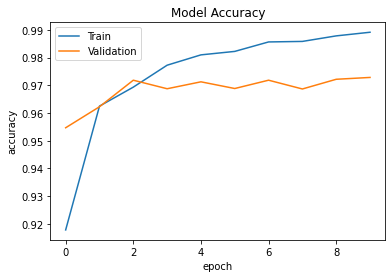

In [ ]:
plt.plot(history112.history['accuracy'])
plt.plot(history112.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model_112.evaluate(x_test112, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09890282899141312
Test accuracy: 0.9749000072479248


**10.Dataset Split**

 Instead of 60k images of training and 10k images for testing, run different models with different training and testing sizes, and see the changes in the accuracies. 

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 2

In [ ]:
c = x_train.flatten() 
d = x_test.flatten()

X=np.concatenate((c,d))
y=np.concatenate((y_train,y_test))

X = X.reshape(70000,784)

In [ ]:
# split the entire data with train set 70% and test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49000, 784)
(21000, 784)
(49000,)
(21000,)


In [ ]:
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

In [ ]:
model_new = Sequential()
model_new.add(Dense(512, activation='relu', input_shape=(784,)))
model_new.add(Dense(256, activation='relu'))
model_new.add(Dense(128, activation='relu'))
model_new.add(Dense(64, activation='relu'))
model_new.add(Dense(num_classes, activation='softmax'))

model_new.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_95 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_96 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_97 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_98 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_new.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_new=model_new.fit(X_train,Y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)       

Epoch 1/10
307/307 - 4s - loss: 1.6409 - accuracy: 0.8555 - val_loss: 0.4863 - val_accuracy: 0.8856
Epoch 2/10
307/307 - 4s - loss: 0.2243 - accuracy: 0.9403 - val_loss: 0.2259 - val_accuracy: 0.9447
Epoch 3/10
307/307 - 4s - loss: 0.1294 - accuracy: 0.9631 - val_loss: 0.2137 - val_accuracy: 0.9443
Epoch 4/10
307/307 - 4s - loss: 0.0861 - accuracy: 0.9733 - val_loss: 0.2334 - val_accuracy: 0.9454
Epoch 5/10
307/307 - 4s - loss: 0.0889 - accuracy: 0.9731 - val_loss: 0.1932 - val_accuracy: 0.9546
Epoch 6/10
307/307 - 4s - loss: 0.0699 - accuracy: 0.9779 - val_loss: 0.1841 - val_accuracy: 0.9579
Epoch 7/10
307/307 - 4s - loss: 0.0669 - accuracy: 0.9794 - val_loss: 0.1731 - val_accuracy: 0.9620
Epoch 8/10
307/307 - 4s - loss: 0.0723 - accuracy: 0.9784 - val_loss: 0.1643 - val_accuracy: 0.9638
Epoch 9/10
307/307 - 4s - loss: 0.0690 - accuracy: 0.9800 - val_loss: 0.1891 - val_accuracy: 0.9606
Epoch 10/10
307/307 - 4s - loss: 0.0723 - accuracy: 0.9794 - val_loss: 0.1616 - val_accuracy: 0.9674

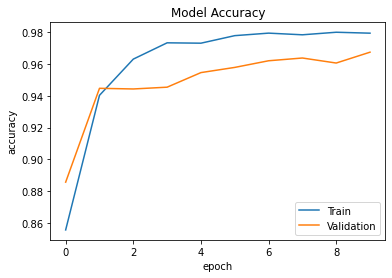

In [ ]:
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model_new.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16715054214000702
Test accuracy: 0.9667142629623413


In [ ]:
#split the entire data into train set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2)

In [ ]:
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

In [ ]:
model_new1 = Sequential()
model_new1.add(Dense(512, activation='tanh', input_shape=(784,)))
model_new1.add(Dense(256, activation='tanh'))
model_new1.add(Dense(128, activation='tanh'))
model_new1.add(Dense(64, activation='tanh'))
model_new1.add(Dense(num_classes, activation='softmax'))

model_new1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_100 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_101 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_102 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_103 (Dense)            (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_new1.compile(loss='categorical_crossentropy',optimizer=RMSprop(0.0001),metrics=['accuracy'])


In [ ]:
history_new1=model_new1.fit(X_train,Y_train,batch_size=batch_size,epochs=10,verbose=2,validation_split=0.2)       


Epoch 1/10
350/350 - 6s - loss: 0.6903 - accuracy: 0.8154 - val_loss: 0.3743 - val_accuracy: 0.8954
Epoch 2/10
350/350 - 5s - loss: 0.2903 - accuracy: 0.9190 - val_loss: 0.2795 - val_accuracy: 0.9184
Epoch 3/10
350/350 - 5s - loss: 0.2172 - accuracy: 0.9381 - val_loss: 0.2340 - val_accuracy: 0.9298
Epoch 4/10
350/350 - 5s - loss: 0.1738 - accuracy: 0.9498 - val_loss: 0.2087 - val_accuracy: 0.9373
Epoch 5/10
350/350 - 5s - loss: 0.1460 - accuracy: 0.9573 - val_loss: 0.1917 - val_accuracy: 0.9409
Epoch 6/10
350/350 - 5s - loss: 0.1223 - accuracy: 0.9638 - val_loss: 0.1789 - val_accuracy: 0.9448
Epoch 7/10
350/350 - 5s - loss: 0.1022 - accuracy: 0.9711 - val_loss: 0.1676 - val_accuracy: 0.9483
Epoch 8/10
350/350 - 5s - loss: 0.0879 - accuracy: 0.9753 - val_loss: 0.1598 - val_accuracy: 0.9495
Epoch 9/10
350/350 - 5s - loss: 0.0749 - accuracy: 0.9789 - val_loss: 0.1547 - val_accuracy: 0.9527
Epoch 10/10
350/350 - 5s - loss: 0.0643 - accuracy: 0.9815 - val_loss: 0.1499 - val_accuracy: 0.9550

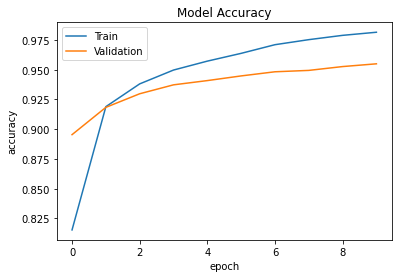

In [ ]:
plt.plot(history_new1.history['accuracy'])
plt.plot(history_new1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
score = model_new1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1476115882396698
Test accuracy: 0.9550714492797852
